# **Importing libraries**

In [ ]:
# Topic: Financial News Sentiment Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

# For handling warnings
import warnings
warnings.filterwarnings('ignore')


# **Exploratory Data Analysis (EDA)**

## **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/news_headline_dataset_mini_copy.csv'

In [ ]:
df = pd.read_csv(dataset) #encoding = 'unicode_escape'
df.head()

,News Headline,Number of words,Confidence Score,Decision,Sentiment
0,Virtual gifting economy is fast picking up in ...,15,-0.63,1,NEUTRAL
1,Industry worries are genuine but RCEP will bri...,16,0.82,2,POSITIVE
2,India annual carbon footprint increased but is...,16,-0.89,0,NEGATIVE
3,"Suresh Prabhu to meet banking , financial secr...",17,0.96,2,POSITIVE
4,investment ideas : World riskiest assets sudde...,13,0.99,2,POSITIVE


In [ ]:
df.shape

(5601, 5)

In [ ]:
df

,News Headline,Number of words,Confidence Score,Decision,Sentiment
0,Virtual gifting economy is fast picking up in ...,15,-0.63,1,NEUTRAL
1,Industry worries are genuine but RCEP will bri...,16,0.82,2,POSITIVE
2,India annual carbon footprint increased but is...,16,-0.89,0,NEGATIVE
3,"Suresh Prabhu to meet banking , financial secr...",17,0.96,2,POSITIVE
4,investment ideas : World riskiest assets sudde...,13,0.99,2,POSITIVE
...,...,...,...,...,...
5596,Warren Buffett firm reports $25B 4Q loss on pa...,11,-1.00,0,NEGATIVE
5597,Pulwama effect : Foreign investors pull out Rs...,15,-1.00,0,NEGATIVE
5598,US - China talks : Superpowers haggling over c...,14,-0.84,0,NEGATIVE
5599,Total Dhamaal Box Office Collection Day 2 : Aj...,21,0.99,2,POSITIVE


## **Data exploration**

In [ ]:
print(f"Feature names : {df.columns.values}") # display features of the dataset

Feature names : ['News Headline' 'Number of words' 'Confidence Score' 'Decision'
 'Sentiment']


In [ ]:
df.isnull().sum() # to find the null values present in any of the features

,0
News Headline,0
Number of words,0
Confidence Score,0
Decision,0
Sentiment,0


In [ ]:
print(f"'News Headline' column value: {df.iloc[125]['News Headline']}") # to display any news headline from the dataset

'News Headline' column value: Arun Jaitley : Indian economy on track to maintain high growth rate : Finance Ministry


In [ ]:
df.dtypes # datatype of each feature

,0
News Headline,object
Number of words,int64
Confidence Score,float64
Decision,int64
Sentiment,object


In [ ]:
print(f"Sentiment value count: \n{df['Sentiment'].value_counts()}") # to display number of positive, negative and neutral news from the dataset

Sentiment value count: 
Sentiment
NEGATIVE    2764
POSITIVE    2206
NEUTRAL      631
Name: count, dtype: int64


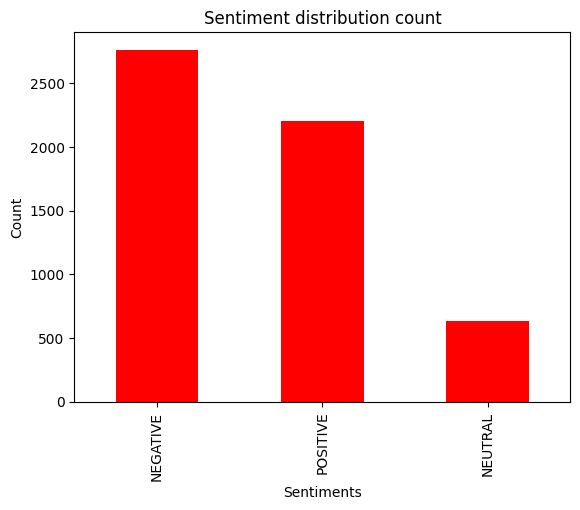

In [ ]:
# display the above count in a bar graph
df['Sentiment'].value_counts().plot.bar(color = 'red')
plt.title('Sentiment distribution count')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

In [ ]:
print(f"Sentiment value count - percentage distribution: \n{round(df['Sentiment'].value_counts()/df.shape[0]*100,2)}") # percentage distribution of the above count in the dataset

Sentiment value count - percentage distribution: 
Sentiment
NEGATIVE    49.35
POSITIVE    39.39
NEUTRAL     11.27
Name: count, dtype: float64


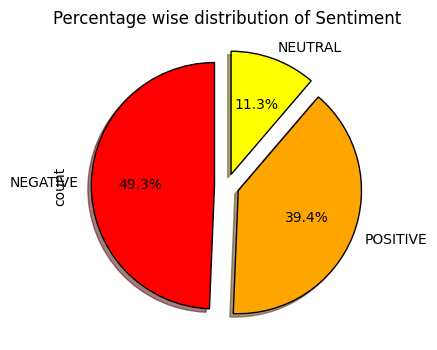

In [ ]:
# to display the same in a pie chart
fig = plt.figure(figsize=(4,4))
colors = ('red','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = df['Sentiment'].value_counts()/df.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)
plt.title('Percentage wise distribution of Sentiment')

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

[Text(0.5, 1.0, 'Count of News headline with respect to number of words present ')]

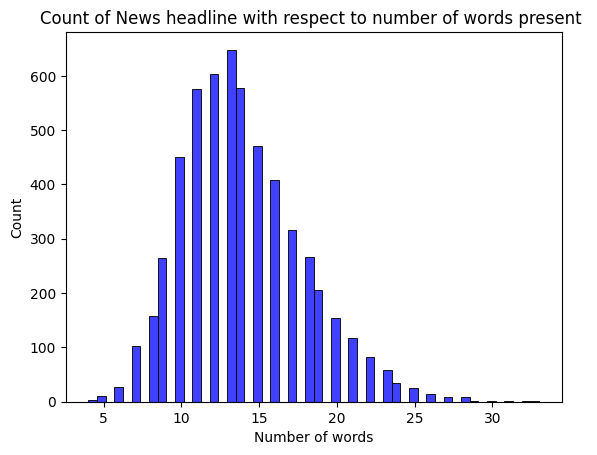

In [ ]:
# to display a histogram on the count of news headline with respect to number of words present
sns.histplot(df['Number of words'],color='blue').set(title='Count of News headline with respect to number of words present ')

# **Data Preprocessing**

In [ ]:
# Importing necessary libraries for nlp technique and setting up stopwords
import re
import nltk
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Cleaning and stemming news headlines, removing stop words and storing them in corpus
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['News Headline'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
# Convert text data to numerical data using CountVectorizer for model training
cv = CountVectorizer(max_features = 6986)

X = cv.fit_transform(corpus).toarray()
y = df['Decision'].values

In [ ]:
# ignore for now
with open('countVectorizer.pkl', 'wb') as f:
    pickle.dump({}, f)

In [ ]:
# ignore for now
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

# **Data splitting as train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (4480, 5986)
y train: (4480,)
X test: (1121, 5986)
y test: (1121,)


# **Data Scaling**

In [ ]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
# ignore for now
with open('scaler.pkl', 'wb') as f:
    pickle.dump({}, f)

In [ ]:
# ignore for now
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# **Model Building**

## **Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9988839285714286
Testing Accuracy : 0.6628010704727921


In [ ]:
y_preds = model_rf.predict(X_test_scl)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       535
           1       0.43      0.07      0.11       137
           2       0.66      0.71      0.68       449

    accuracy                           0.66      1121
   macro avg       0.59      0.52      0.51      1121
weighted avg       0.64      0.66      0.63      1121



In [ ]:
cm = confusion_matrix(y_test, y_preds)

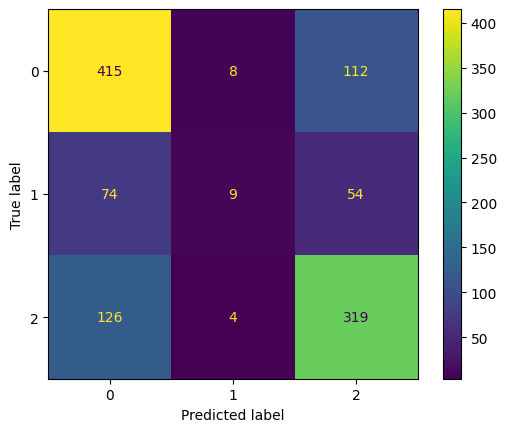

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

## **Gaussian Naive Bayes**

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train_scl, y_train)

GaussianNB()

In [ ]:
print("Training Accuracy :", model_nb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_nb.score(X_test_scl, y_test))

Training Accuracy : 0.8002232142857143
Testing Accuracy : 0.46922390722569135


In [ ]:
y_preds = model_nb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.45      0.52       535
           1       0.14      0.26      0.18       137
           2       0.53      0.57      0.55       449

    accuracy                           0.48      1121
   macro avg       0.43      0.43      0.42      1121
weighted avg       0.53      0.48      0.49      1121



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[239 124 172]
 [ 45  36  56]
 [ 96  95 258]]


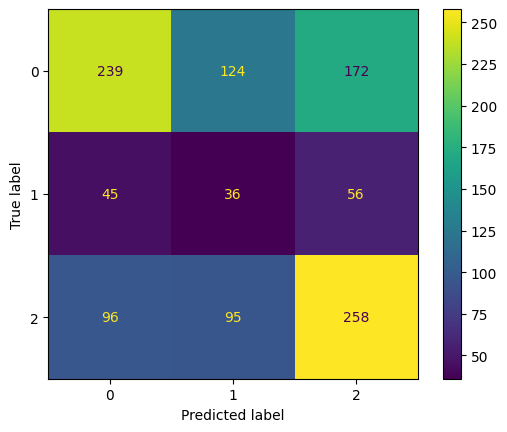

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_nb.classes_)
cm_display.plot()
plt.show()

## **Decision Tree Classifier**

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9988839285714286
Testing Accuracy : 0.5905441570026762


In [ ]:
y_preds = model_dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       535
           1       0.19      0.12      0.14       137
           2       0.59      0.63      0.61       449

    accuracy                           0.58      1121
   macro avg       0.47      0.47      0.46      1121
weighted avg       0.56      0.58      0.57      1121



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[351  44 140]
 [ 67  16  54]
 [141  26 282]]


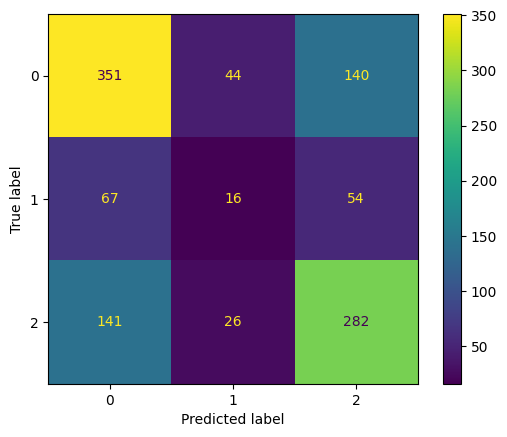

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

## **Multinomial Naive Bayes**

In [ ]:
model_mnb = MultinomialNB()
model_mnb.fit(X_train_scl, y_train)

MultinomialNB()

In [ ]:
print("Training Accuracy :", model_mnb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_mnb.score(X_test_scl, y_test))

Training Accuracy : 0.8294642857142858
Testing Accuracy : 0.6289027653880463


In [ ]:
y_preds = model_mnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       535
           1       0.12      0.03      0.05       137
           2       0.64      0.65      0.65       449

    accuracy                           0.64      1121
   macro avg       0.48      0.49      0.47      1121
weighted avg       0.59      0.64      0.61      1121



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[423  14  98]
 [ 70   4  63]
 [142  16 291]]


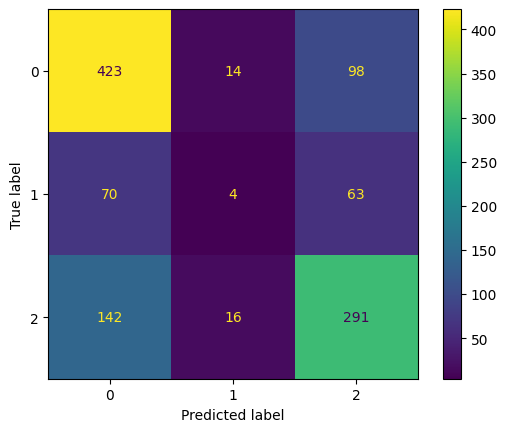

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_mnb.classes_)
cm_display.plot()
plt.show()

## **XGBoost Classifier**

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.7879464285714286
Testing Accuracy : 0.6306868867082962


In [ ]:
y_preds = model_xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       535
           1       0.37      0.05      0.09       137
           2       0.65      0.61      0.63       449

    accuracy                           0.63      1121
   macro avg       0.55      0.49      0.47      1121
weighted avg       0.61      0.63      0.60      1121



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[429   8  98]
 [ 79   7  51]
 [172   4 273]]


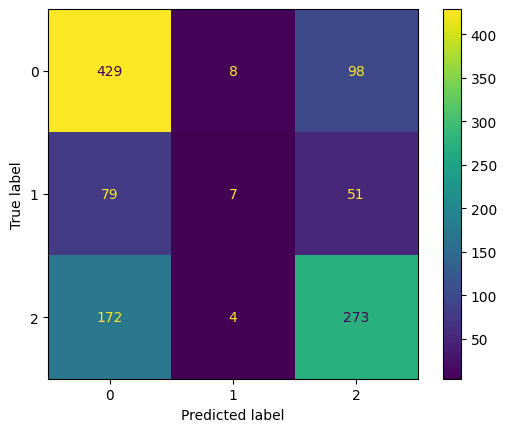

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump({}, f)

In [ ]:
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

## **KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knneigh = KNeighborsClassifier(n_neighbors=3)
knneigh.fit(X_train_scl, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Training Accuracy :", knneigh.score(X_train_scl, y_train))
print("Testing Accuracy :", knneigh.score(X_test_scl, y_test))

Training Accuracy : 0.8145089285714285
Testing Accuracy : 0.5084745762711864


In [ ]:
y_preds = knneigh.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       535
           1       0.08      0.05      0.06       137
           2       0.51      0.63      0.57       449

    accuracy                           0.53      1121
   macro avg       0.41      0.41      0.41      1121
weighted avg       0.51      0.53      0.52      1121



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[299  43 193]
 [ 55   7  75]
 [125  40 284]]


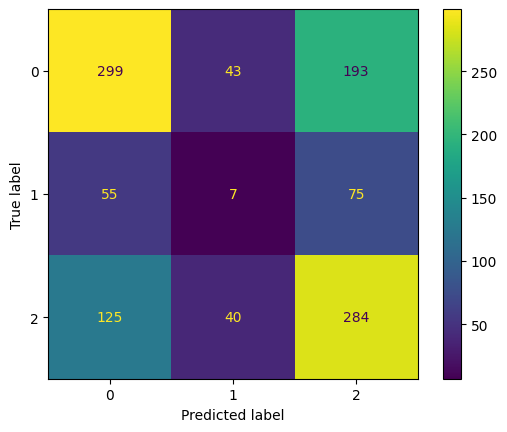

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knneigh.classes_)
cm_display.plot()
plt.show()

## **Bernoulli Naive Bayes**

In [ ]:
model_bnb = BernoulliNB()
model_bnb.fit(X_train_scl, y_train)

BernoulliNB()

In [ ]:
print("Training Accuracy :", model_bnb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_bnb.score(X_test_scl, y_test))

Training Accuracy : 0.7946428571428571
Testing Accuracy : 0.6520963425512935


In [ ]:
y_preds = model_bnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       535
           1       0.00      0.00      0.00       137
           2       0.66      0.64      0.65       449

    accuracy                           0.65      1121
   macro avg       0.44      0.49      0.46      1121
weighted avg       0.58      0.65      0.61      1121



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[445   3  87]
 [ 77   0  60]
 [162   1 286]]


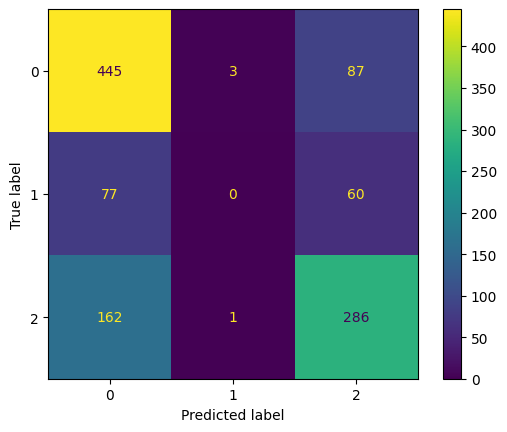

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_bnb.classes_)
cm_display.plot()
plt.show()

# **Model Comparison**

In [ ]:
# Comparing the model performance of all the above 7 models
rf_results = pd.DataFrame(['Random forest', model_rf.score(X_test_scl, y_test)]).transpose()
nb_results = pd.DataFrame(['Gaussian Naive Bayes', model_nb.score(X_test_scl, y_test)]).transpose()
dt_results = pd.DataFrame(['Decision Tree', model_dt.score(X_test_scl, y_test)]).transpose()
mnb_results = pd.DataFrame(['Multinomial Naive Bayes', model_mnb.score(X_test_scl, y_test)]).transpose()
xgb_results = pd.DataFrame(['XGBoost Classifier', model_xgb.score(X_test_scl, y_test)]).transpose()
knneigh_results = pd.DataFrame(['KNeighbors Classifier', knneigh.score(X_test_scl, y_test)]).transpose()
bnb_results = pd.DataFrame(['Bernoulli Naive Bayes', model_bnb.score(X_test_scl, y_test)]).transpose()

df_models = pd.concat([rf_results, nb_results, dt_results, mnb_results, xgb_results, knneigh_results, bnb_results], axis=0)
df_models.columns = ['Method', 'Accuracy']
df_models.reset_index(drop=True)


,Method,Accuracy
0,Random forest,0.662801
1,Gaussian Naive Bayes,0.469224
2,Decision Tree,0.590544
3,Multinomial Naive Bayes,0.628903
4,XGBoost Classifier,0.630687
5,KNeighbors Classifier,0.508475
6,Bernoulli Naive Bayes,0.652096
